In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

## Importing the data

In [2]:
consumption=pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CreditConsumptionData.xlsx")
behaviour =pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerBehaviorData.xlsx")
demographic=pd.read_excel("C:\\Users\\sudhi\\OneDrive\\Desktop\\Analytics Labs\\Data Engineer\\ML and AI\\Case Study\\11. Capstone Case Study - Predict Cred Card Consumption\\CustomerDemographics.xlsx")

In [3]:
df=pd.merge(left=behaviour,right=consumption,left_on=consumption['ID'],right_on=behaviour['ID'],how='inner')

df=df.drop('key_0',axis=1)

df=pd.merge(left=df,right=demographic,left_on=df['ID_y'],right_on=demographic['ID'],how='inner')

df.head()

df=df.drop(['key_0','ID_x','ID_y'],axis=1)

df.head(2)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.0,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.0,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84,10832.0,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.0,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.0,1,4,25125.0,12912.33,18369.0,3,49,20585.0,Y,3812.69,179050.0,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0


## Exploatory Data Analysis

### Missing Values

##### 
here we will check for missing values.

In [4]:
df.isnull().sum().sum()

5017

#####
Here we have 5017 missing values .For 5000 values we have to make predictions, we will create a new dataframe containing all the data of customers for which we have to predict.
Apart from that, there are 17 missing data points which we can simply drop as the numbers are very less .

In [5]:
null_cc_cons = pd.isnull(df['cc_cons'])
pred_df = df[null_cc_cons].reset_index(drop=True)
pred_df.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,2795.45,1290.0,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,56,6,125000,1,1,1.0,1,13.80,376600.50,1633.0,-5715.49023,27646.84,44341.00,16.0,36,24485.0,23512.67,41755.0,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49,NaN,17591,current,M,37,MEDIUM,11.9,4,575.0,1,16.0
1,29405.13,1640.0,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,38,31,59000,1,1,1.0,1,101891.25,470000.00,891.0,35346.00000,32247.25,21946.00,42.0,5,3375.0,15049.44,130299.0,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45,NaN,13541,current,M,33,MEDIUM,7.8,6,394.0,0,19.0
2,5985.20,6189.0,2696.09,766.00,716.00,4133.22,7.0,30,5,24,27,2,49999,1,1,1.0,1,53374.97,674291.83,54101.0,2557.00000,63169.00,36616.50,41.0,6,14950.0,133659.00,40422.0,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28,NaN,13431,current,M,53,LOW,33.0,10,324.0,1,15.0
3,2105.93,18225.0,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,1,11,520000,1,1,1.0,1,9118.35,470000.00,5905.0,5464.00000,39442.80,43173.38,46.0,1,235844.0,99686.03,48148.0,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79,NaN,8687,current,M,33,MEDIUM,7.8,5,370.0,1,7.0
4,3269.00,3532.0,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,25,1,152000,1,1,1.0,1,12850544.36,101.24,130000.0,1332.00000,8937.00,15232.00,11.0,1,14495.0,190374.25,25926.0,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20,NaN,14727,current,M,62,LOW,12.6,9,505.0,1,3.0


In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum().sum()

0

### Numerical Variables

In [9]:
df_num = df.select_dtypes(exclude='object')
df.head(3)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,1,1,1.0,1,331.2,130000.0,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.0,1,108,97916.0,45253.64,47635.0,2,18,19947.0,Y,3448.84,10832.0,14081,current,M,47,MEDIUM,8.1,8,814.0,1,17.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,1,1,1.0,1,5809950.0,3.0,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.0,1,4,25125.0,12912.33,18369.0,3,49,20585.0,Y,3812.69,179050.0,5124,current,F,27,MEDIUM,6.3,7,249.0,1,7.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,1,1,1.0,1,27324.0,176487.6,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.0,70,11,38546.0,93567.51,26713.0,47,49,13950.0,Y,9432.90,888.0,1119,current,M,35,MEDIUM,4.5,9,958.0,0,9.0


In [18]:
print('Number of numerical variables: ', len(df_num.columns))

Number of numerical variables:  45


#### Numerical variables are usually of 2 type- Continous variable and Discrete Variables


##### Discrete Variables

In [56]:
df_num_dis=[x for x in df_num if len(df[x].unique())<25]
print("Number of discreate variables : ", len(df_num_dis))

Number of discreate variables :  7


In [59]:
print("Discreate variables are ")
df_num[df_num_dis].head(3)

Discreate variables are 


,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction
0,1,1,1.0,1,8,1,17.0
1,1,1,1.0,1,7,1,7.0
2,1,1,1.0,1,9,0,9.0


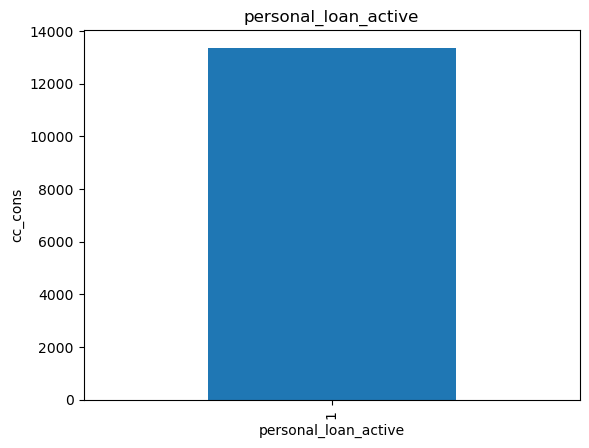

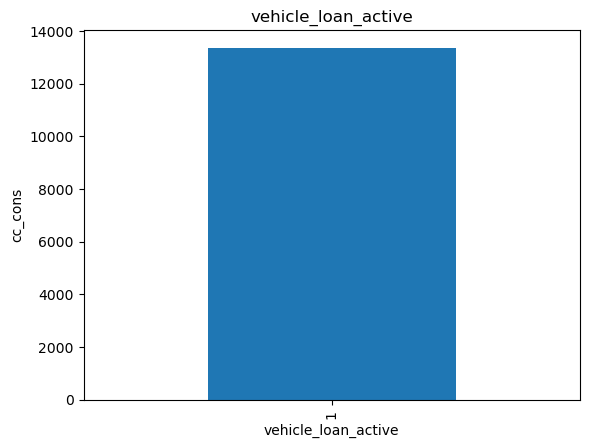

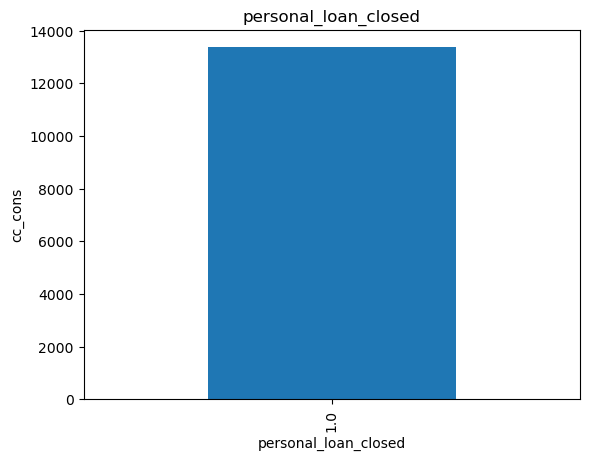

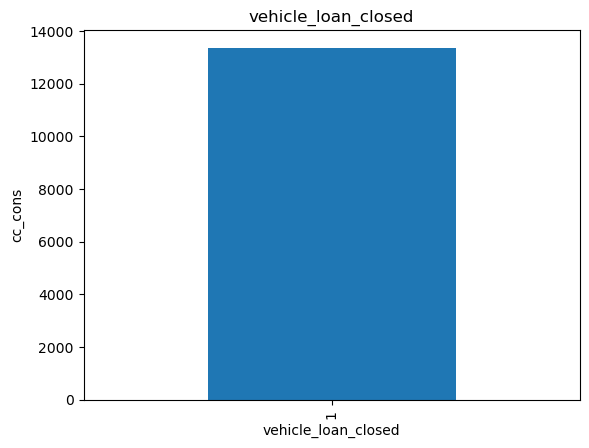

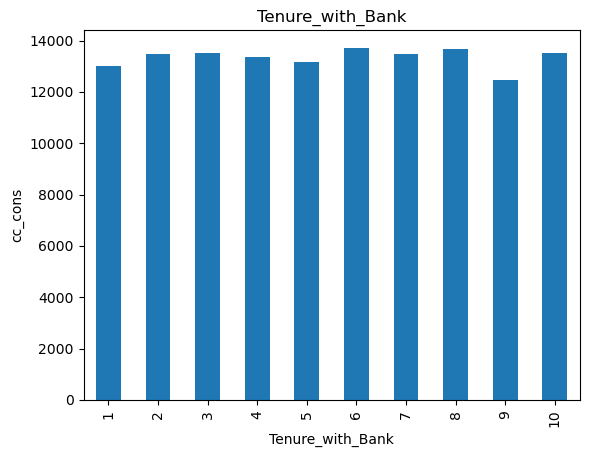

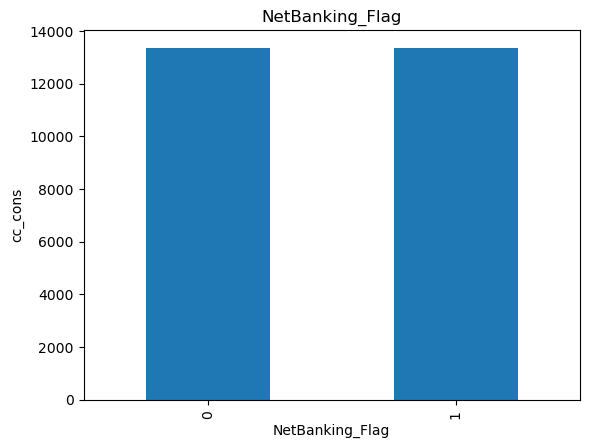

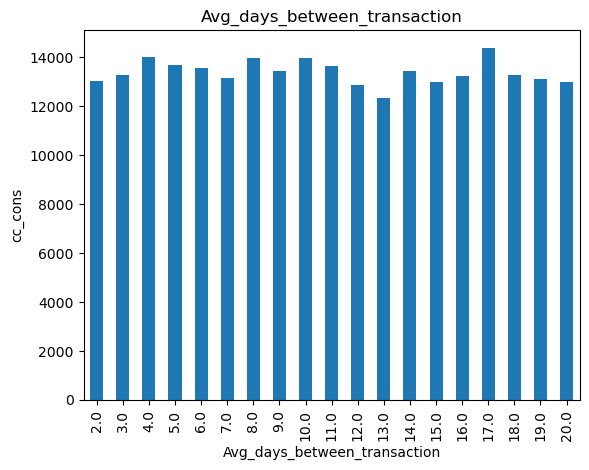

In [66]:
for i in df_num_dis:
    df.groupby(i)['cc_cons'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('cc_cons')
    plt.title(i)
    plt.show()

##### Some discreat variable have relationship with cc_cons(Target)

##### Continuous Variable

In [61]:
df_num_cont=[x for x in df_num if len(df[x].unique())>25]

In [62]:
print("Number of discreate variables : ", len(df_num_cont))

Number of discreate variables :  38


In [63]:
print("Continuous variables are ")
df_num[df_num_cont].head(3)

Continuous variables are 


,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,ID,age,Emp_Tenure_Years,region_code
0,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,1,42,358000,331.2,130000.0,300500.0,12174.0,25210.23,27532.37,103.0,36,28579.0,44974.63,42852.0,1,108,97916.0,45253.64,47635.0,2,18,19947.0,3448.84,10832.0,14081,47,8.1,814.0
1,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,1,17,114000,5809950.0,3.0,610000.0,2351.0,30937.00,50784.00,40.0,35,25379.0,117575.67,24257.0,1,4,25125.0,12912.33,18369.0,3,49,20585.0,3812.69,179050.0,5124,27,6.3,249.0
2,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,62,42,360000,27324.0,176487.6,2156.0,3735.0,12940.25,26345.00,11.0,3,19224.0,14646.35,38306.0,70,11,38546.0,93567.51,26713.0,47,49,13950.0,9432.90,888.0,1119,35,4.5,958.0


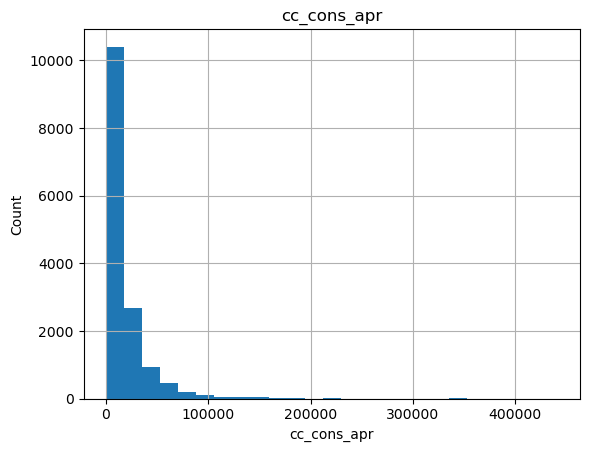

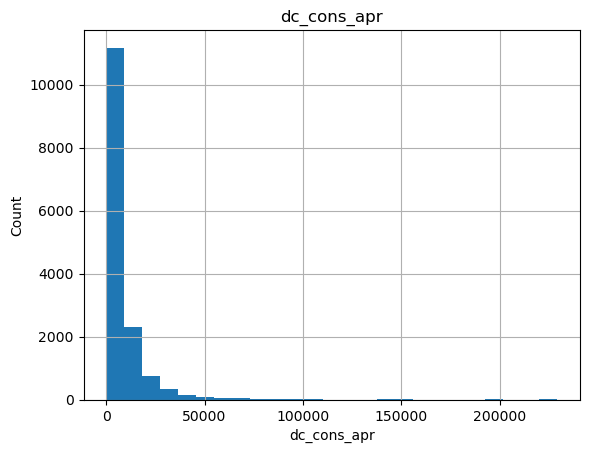

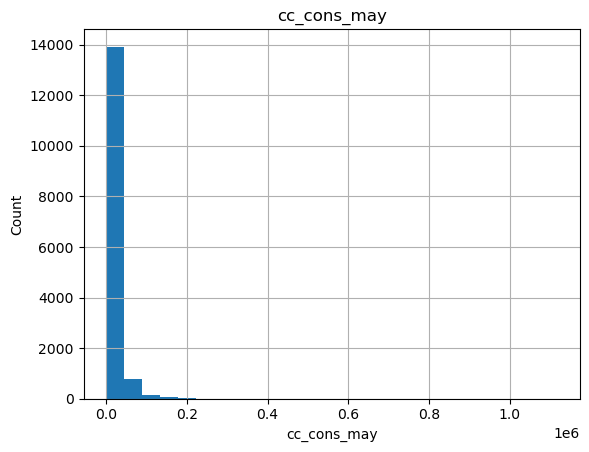

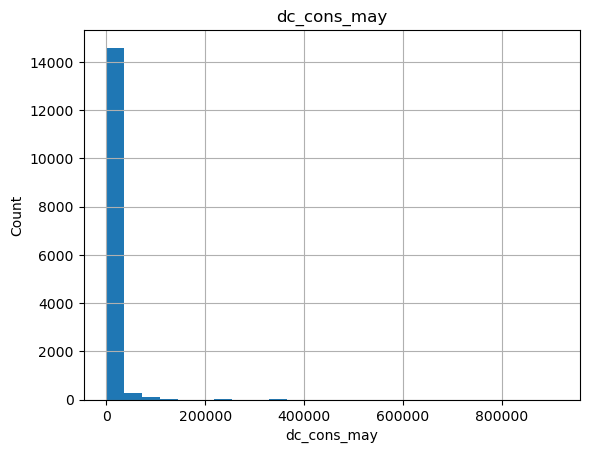

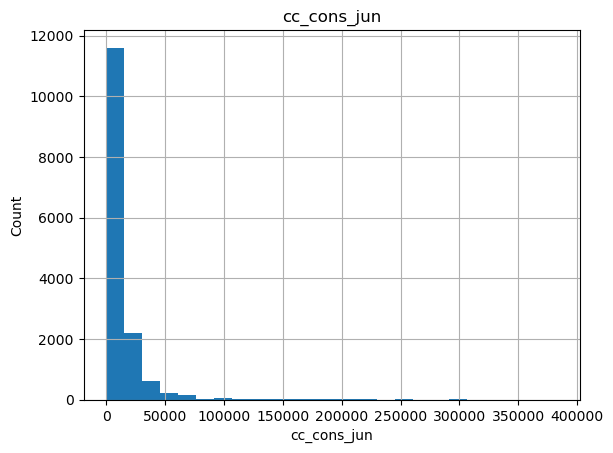

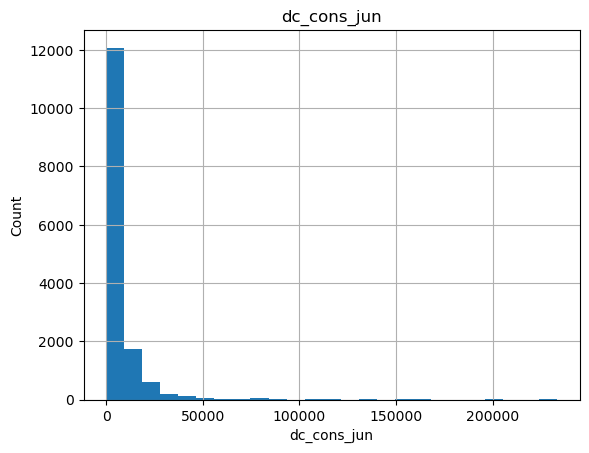

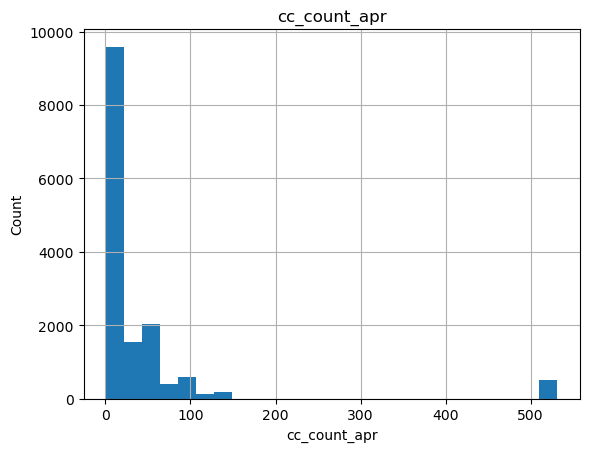

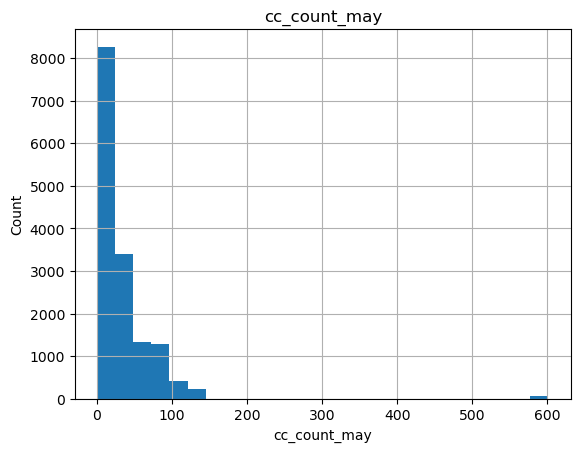

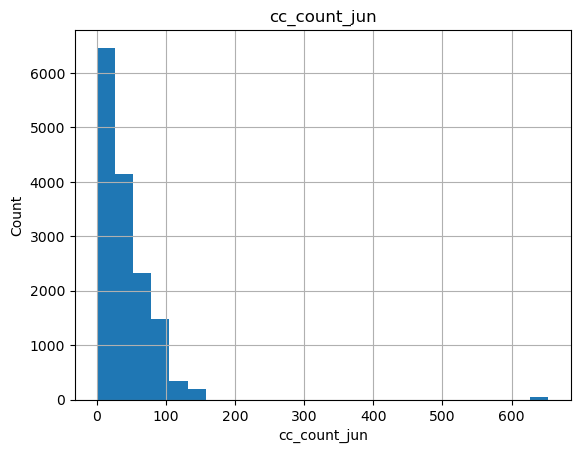

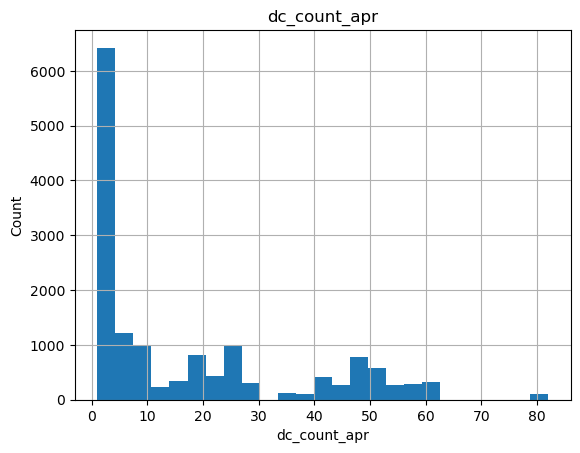

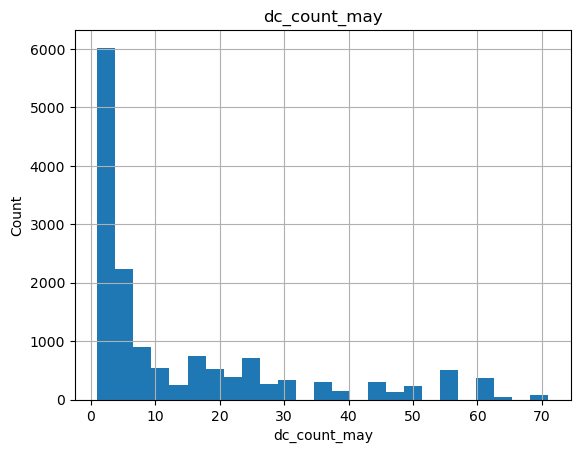

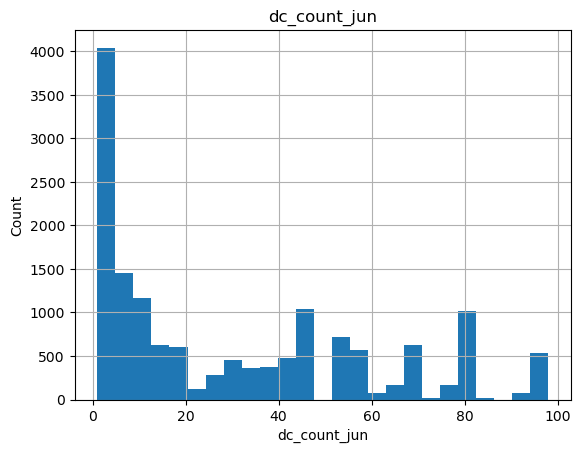

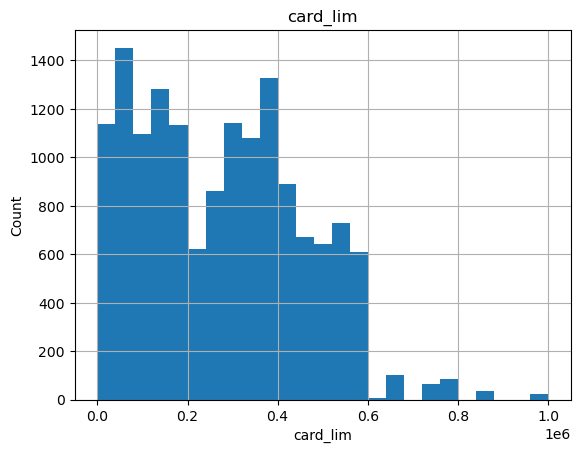

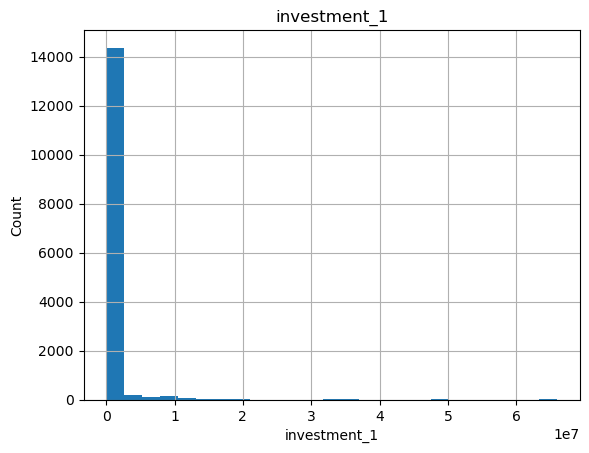

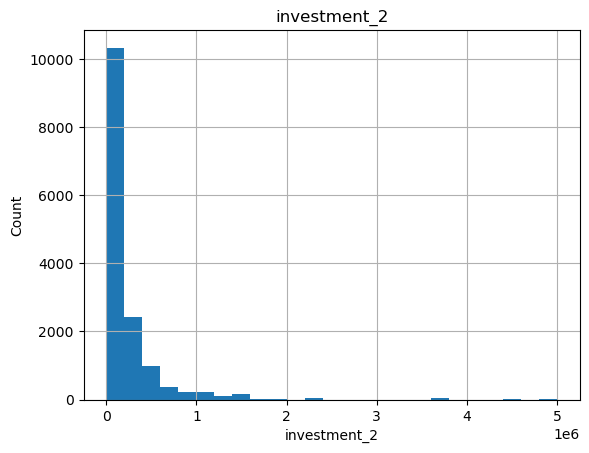

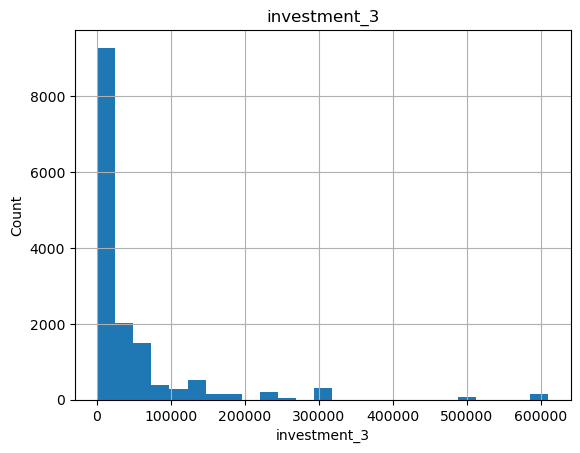

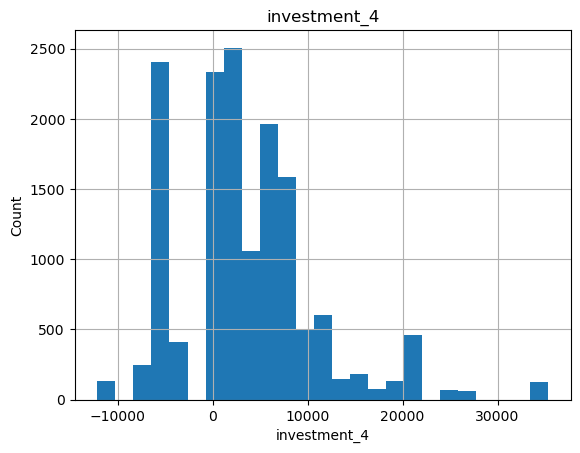

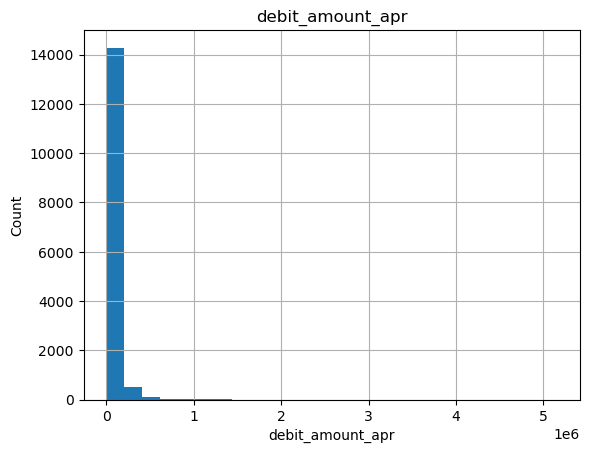

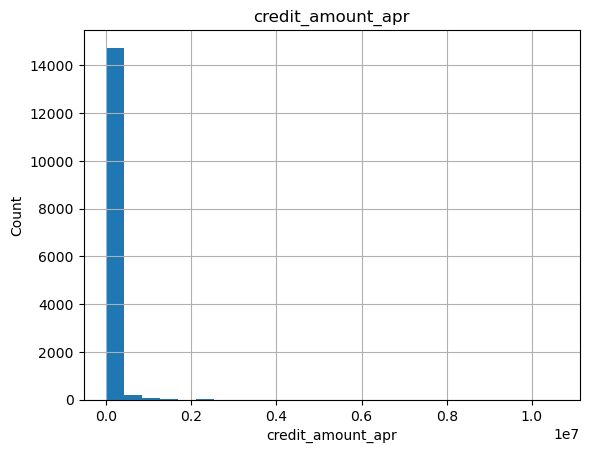

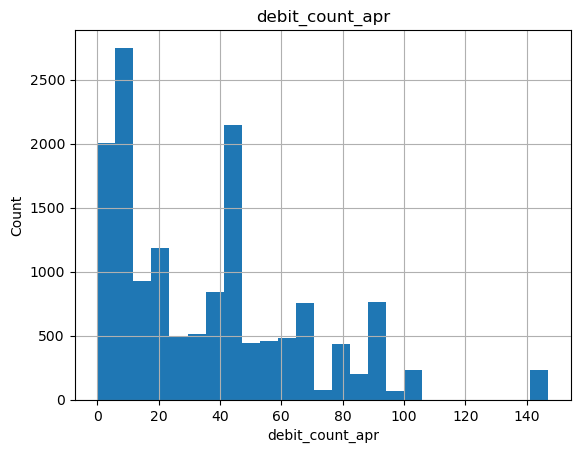

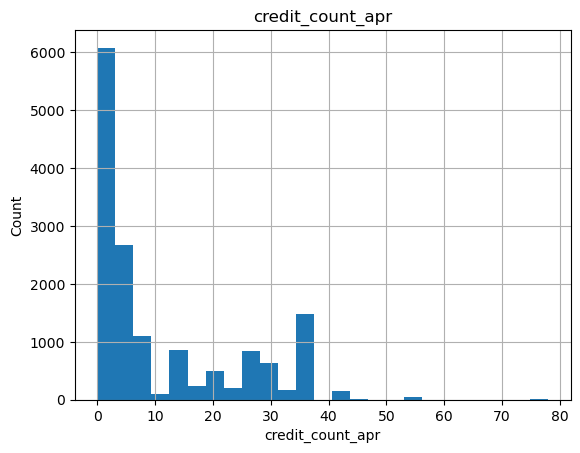

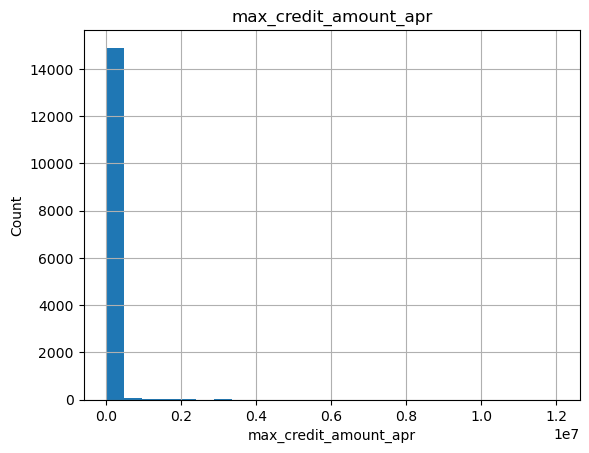

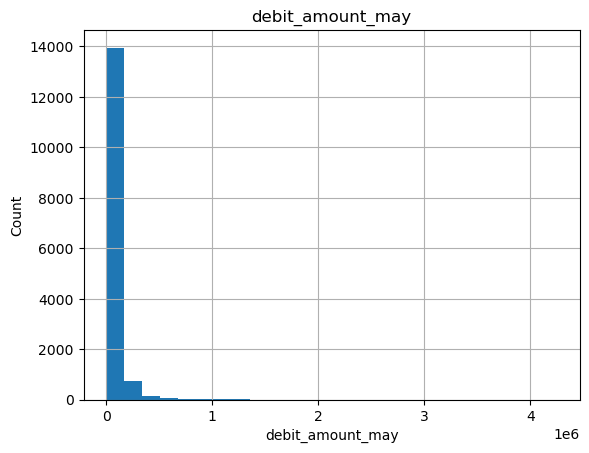

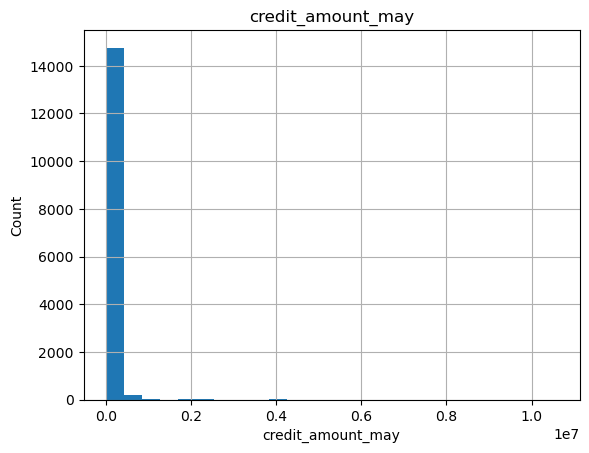

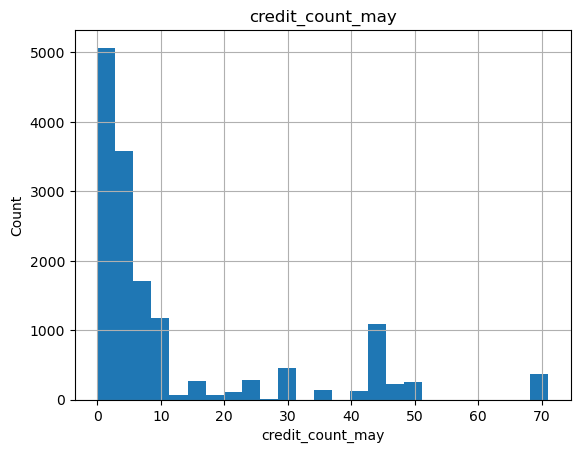

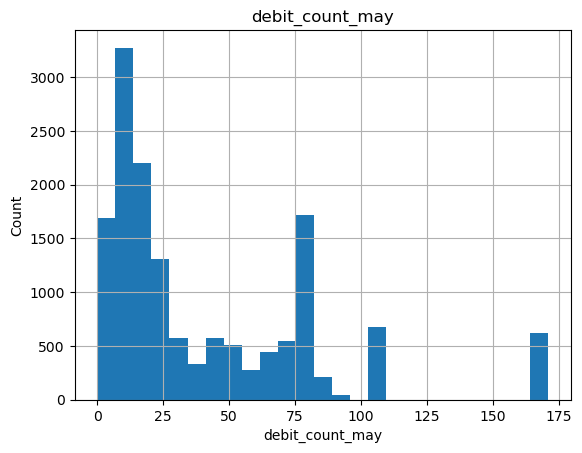

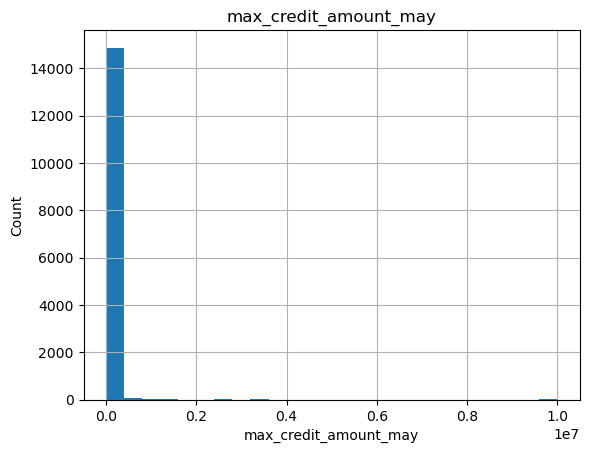

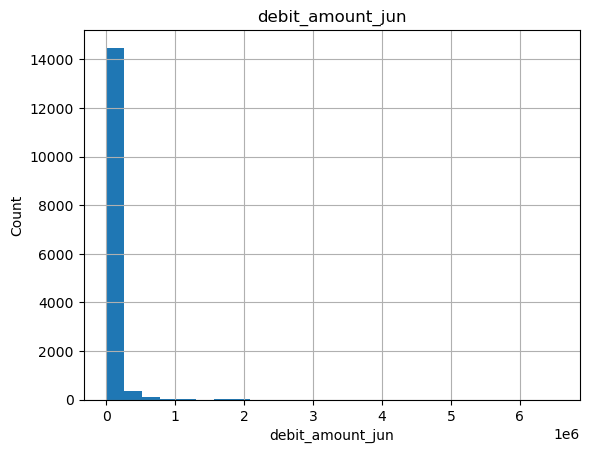

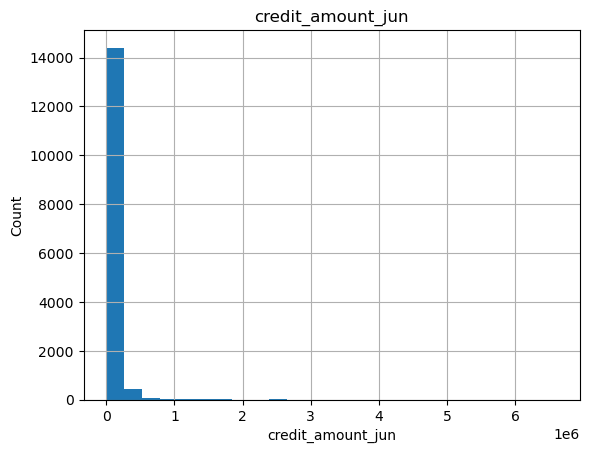

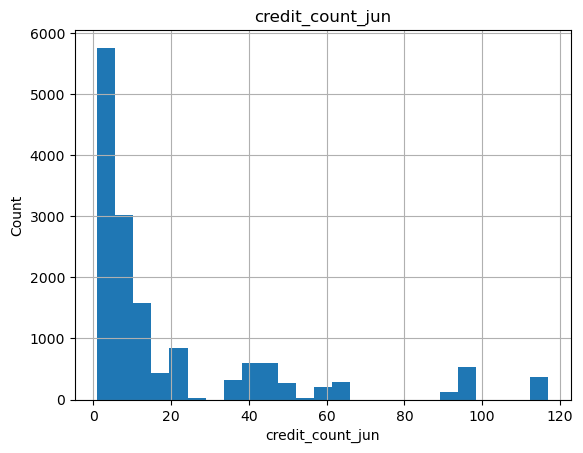

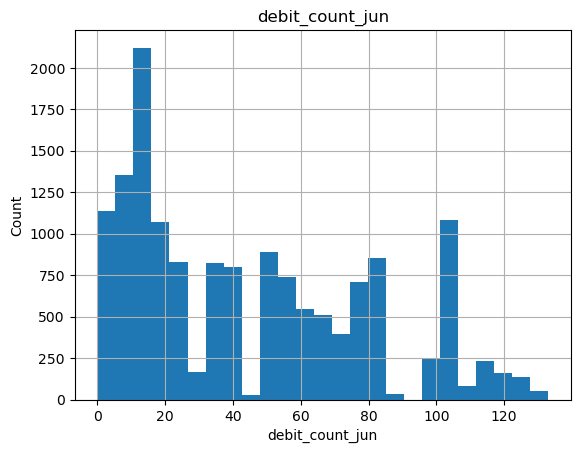

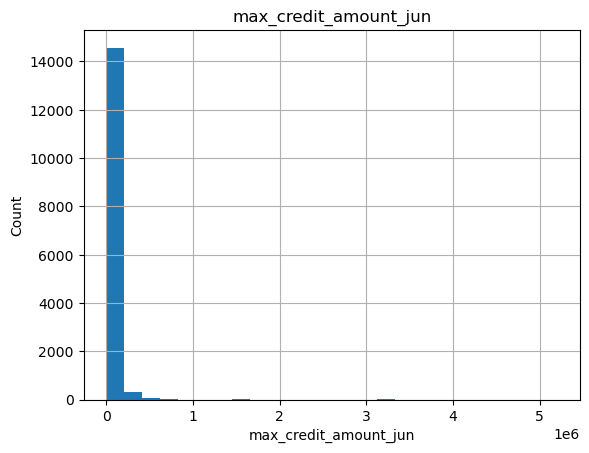

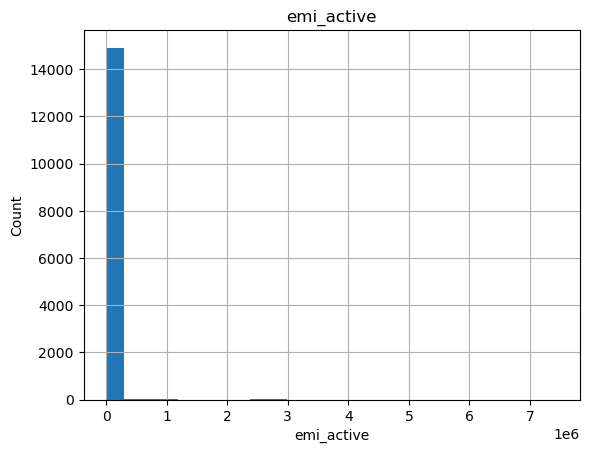

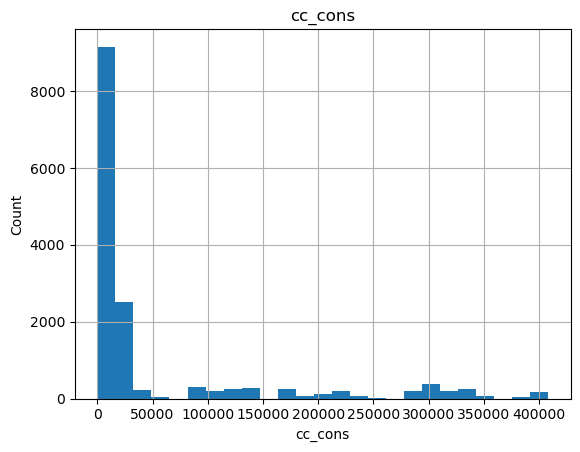

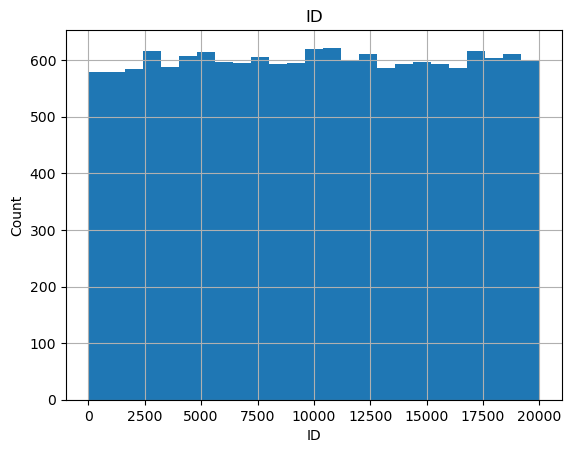

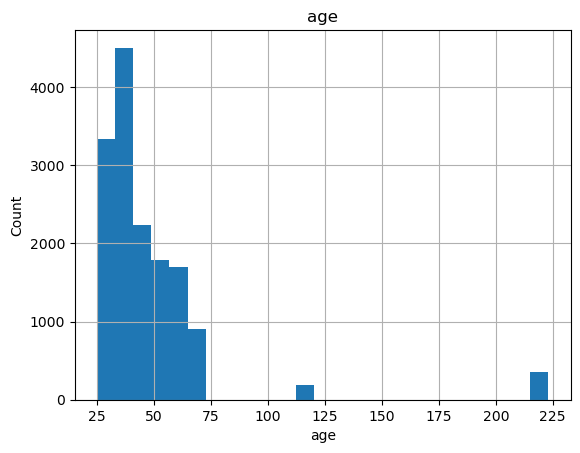

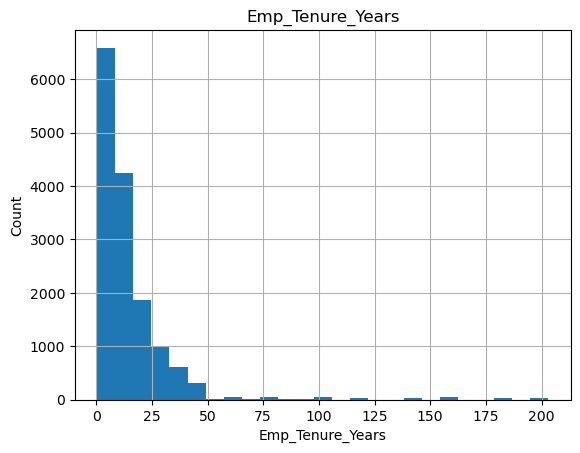

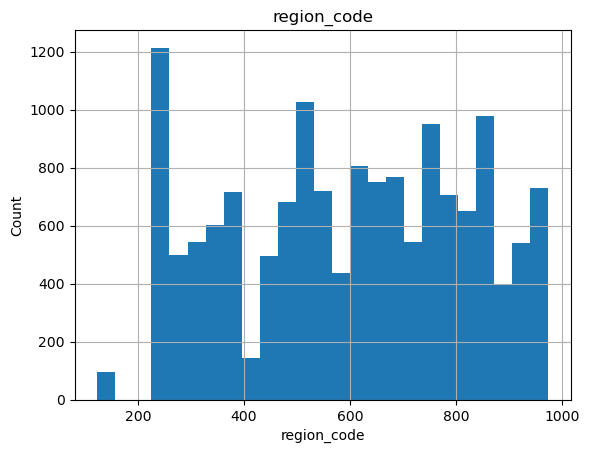

In [67]:
for i in df_num_cont:
    df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

### Corelation between numerical columns

In [93]:
corr= df_num.corr()

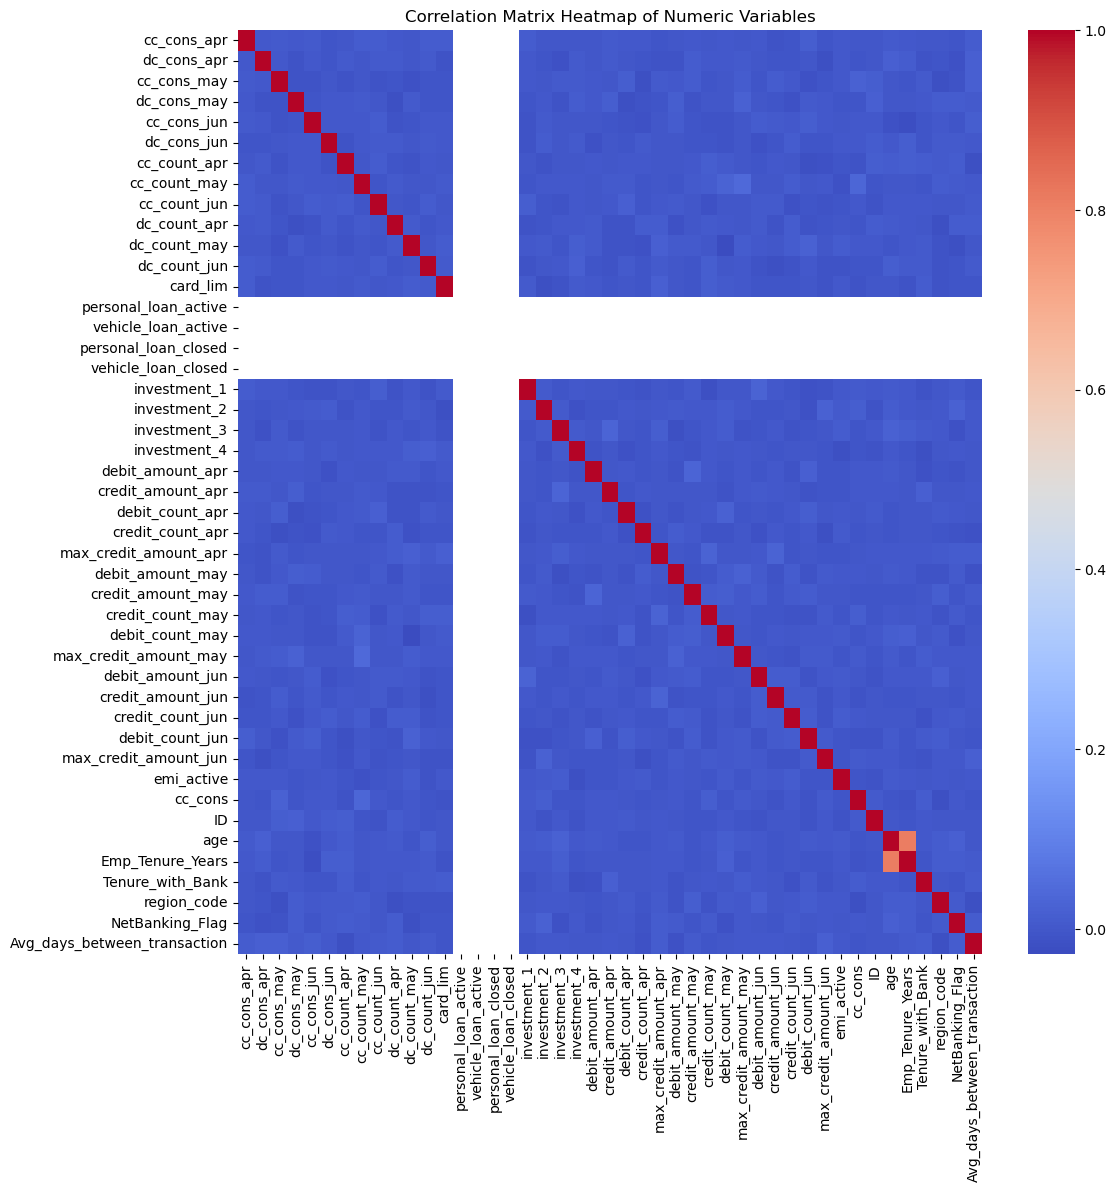

In [95]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap of Numeric Variables')
plt.show()

### Outliers

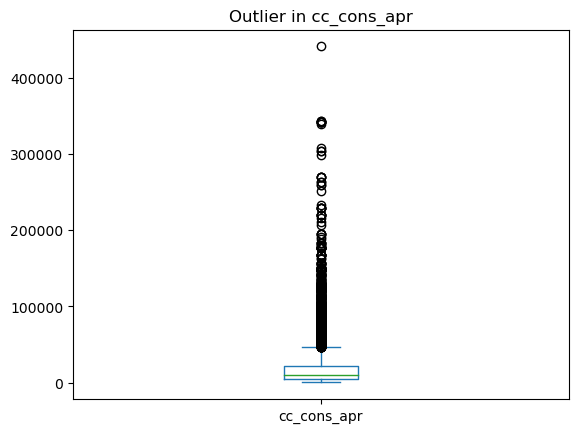

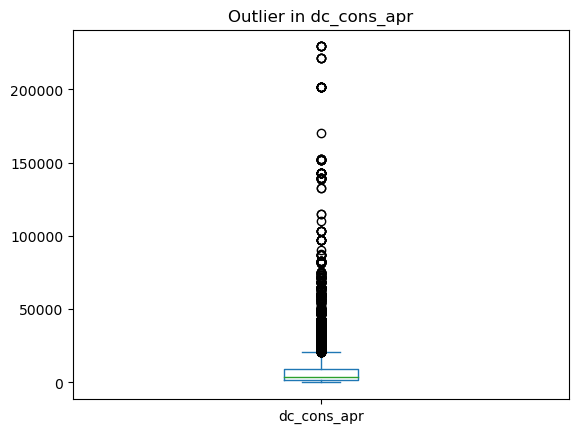

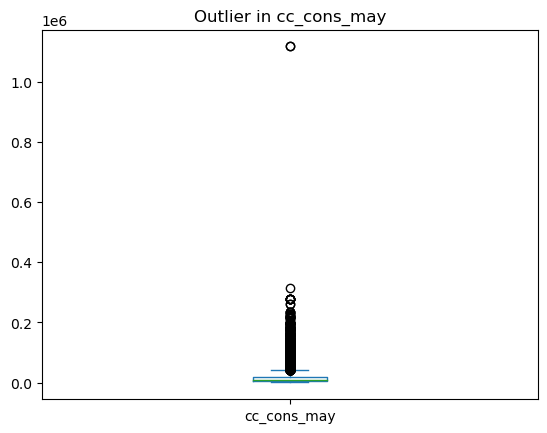

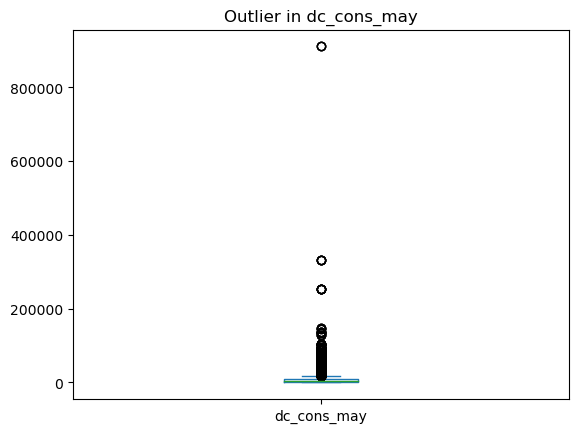

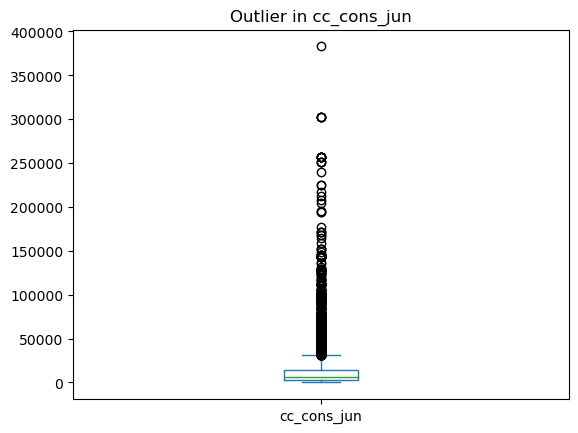

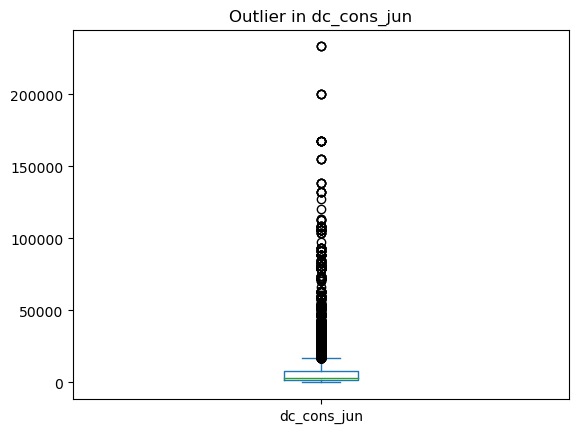

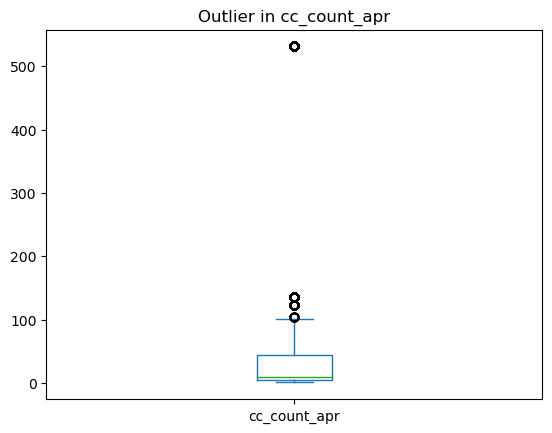

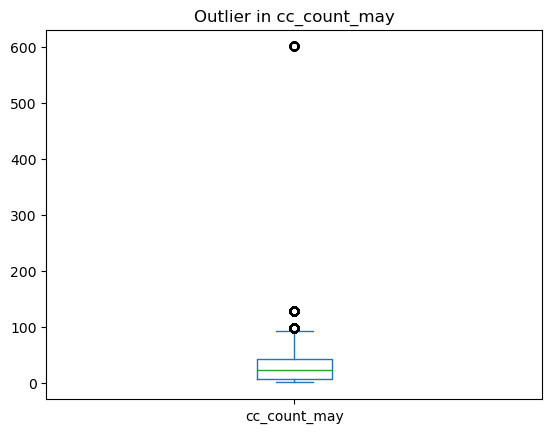

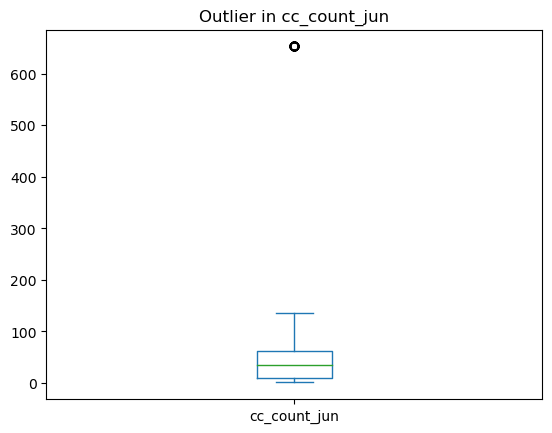

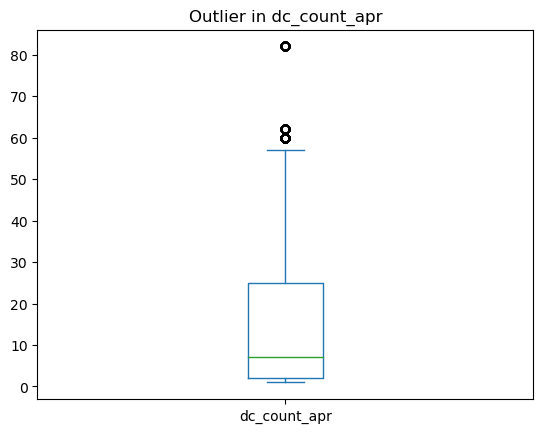

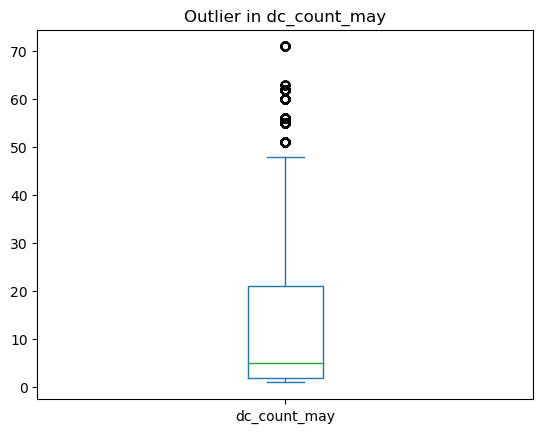

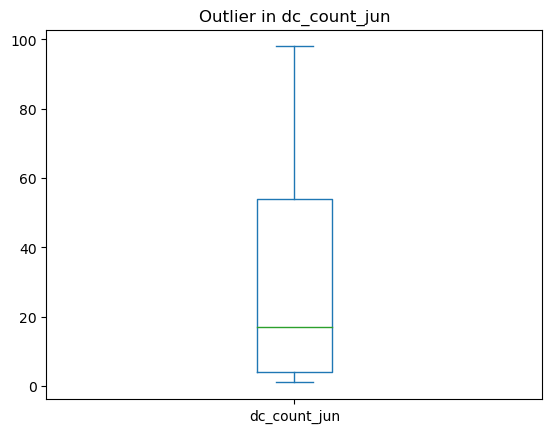

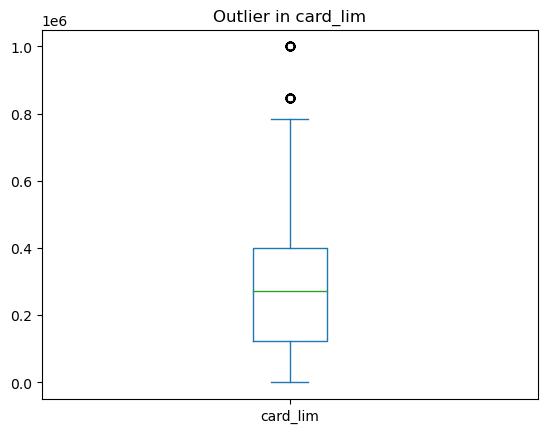

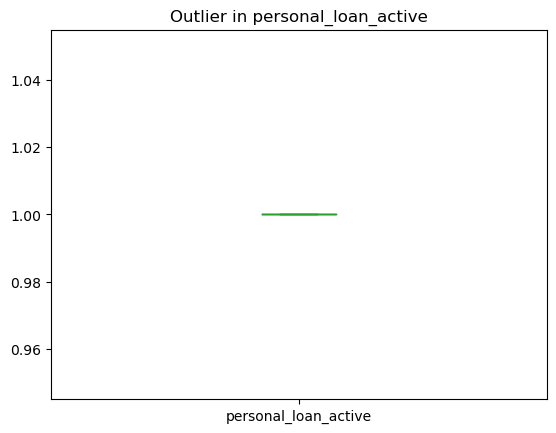

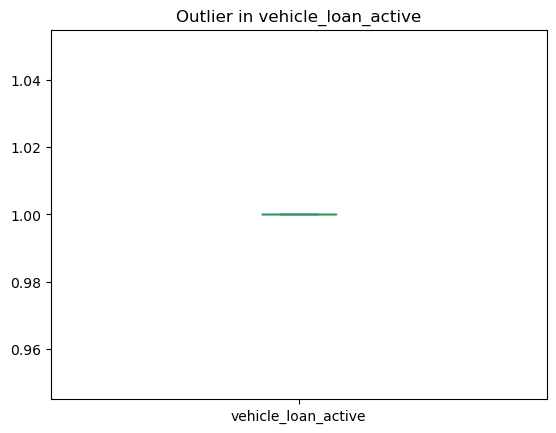

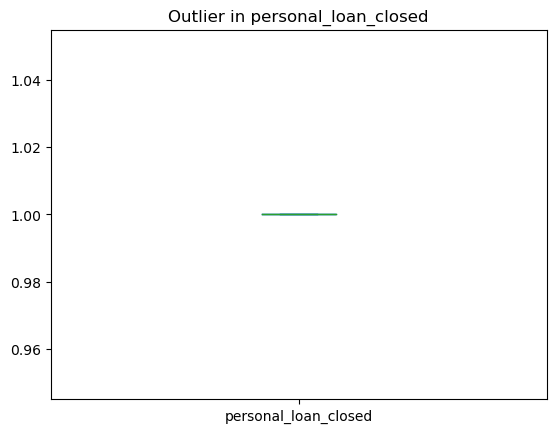

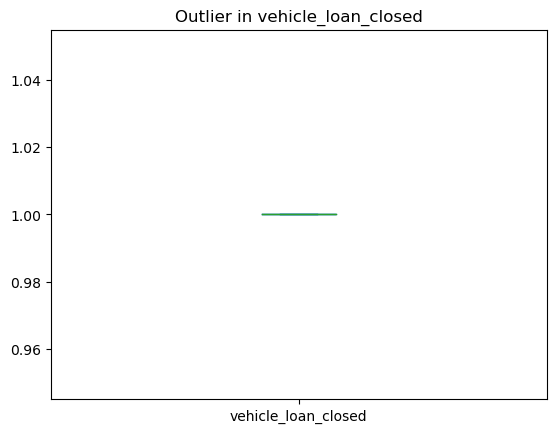

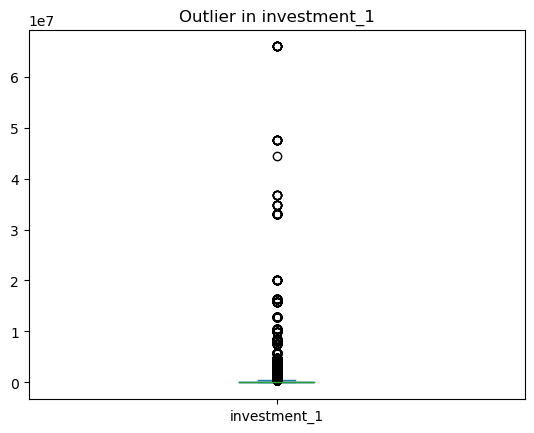

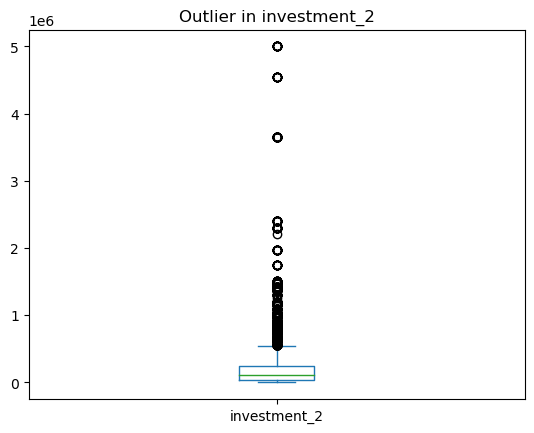

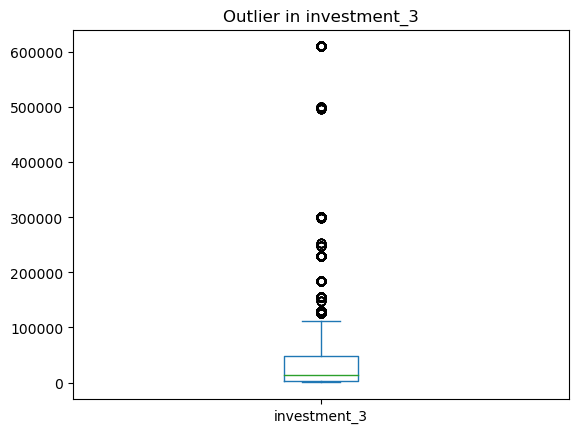

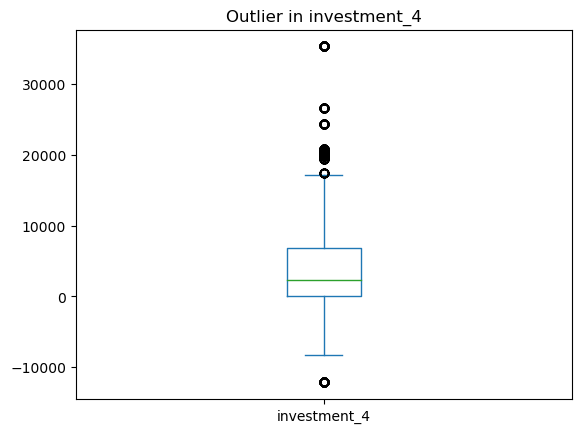

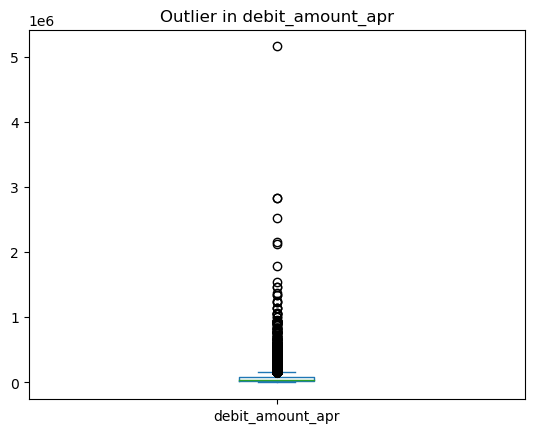

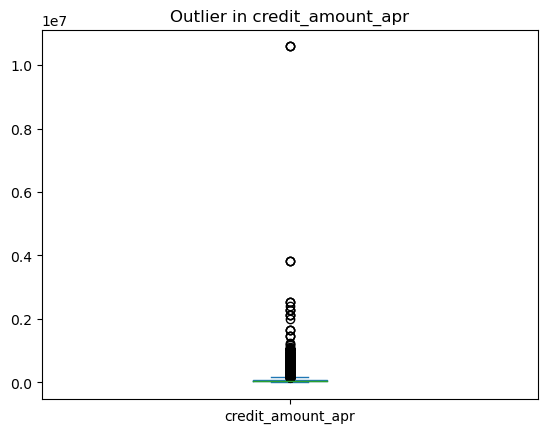

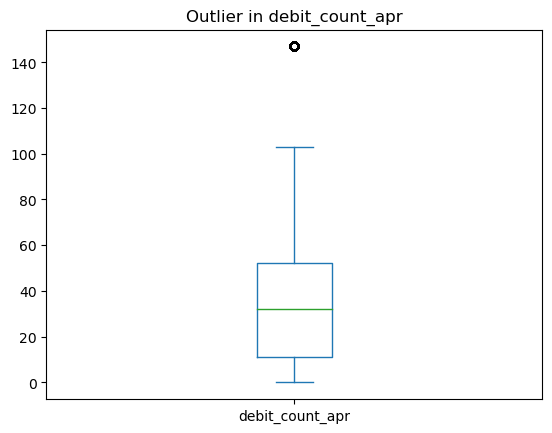

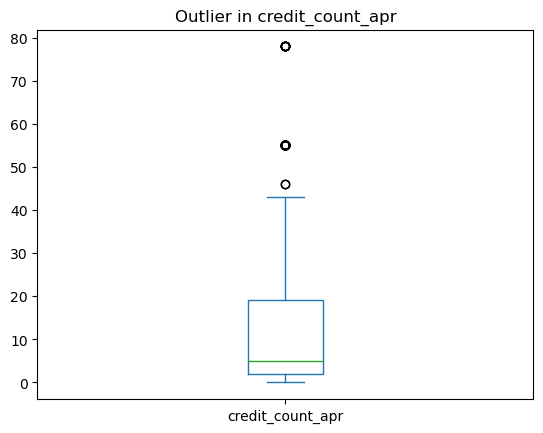

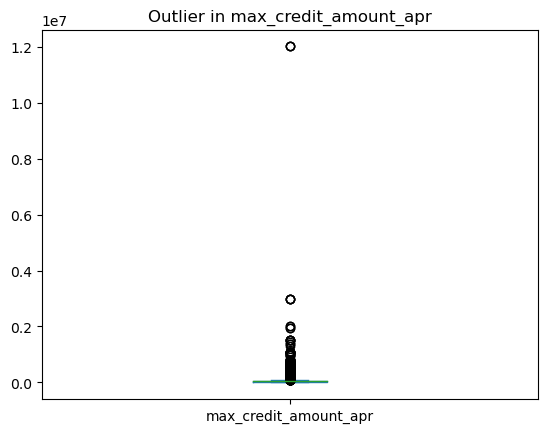

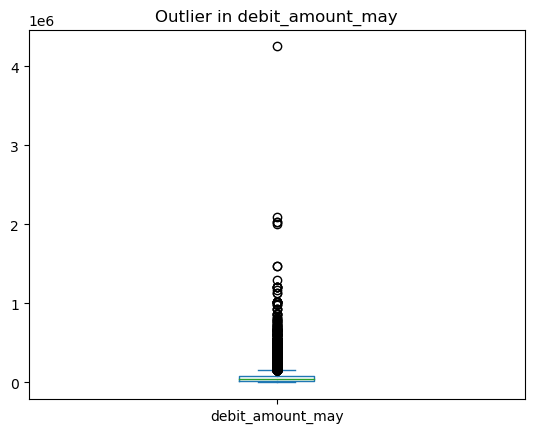

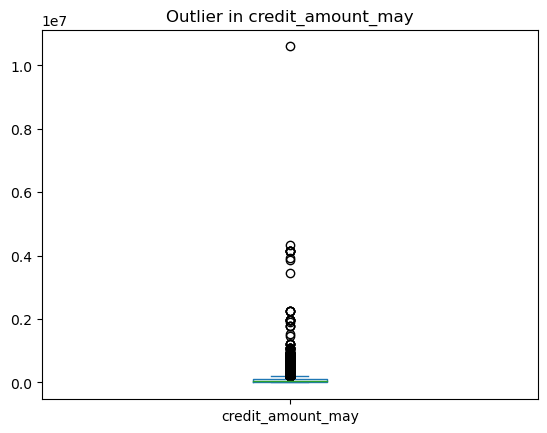

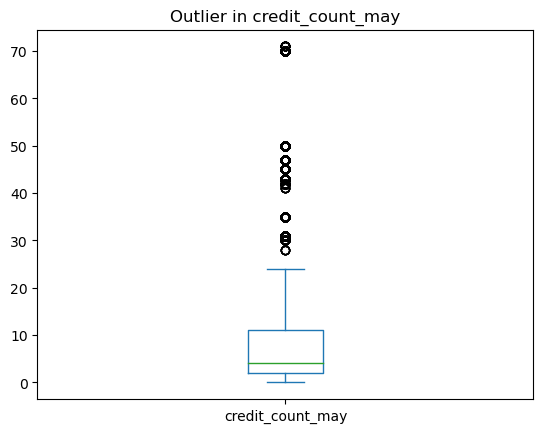

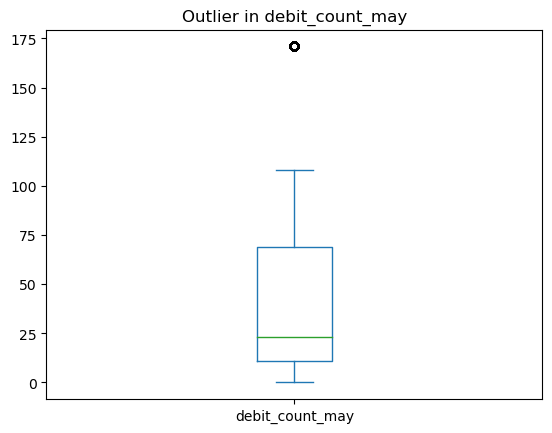

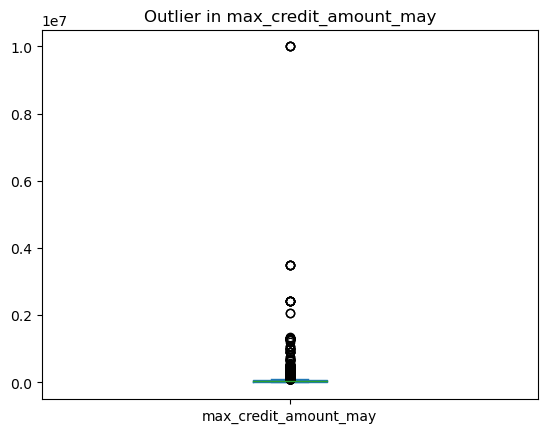

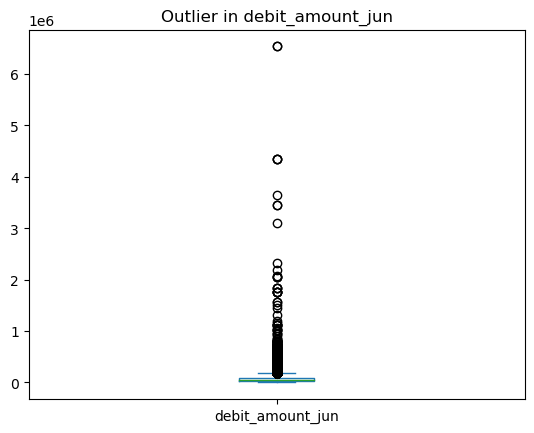

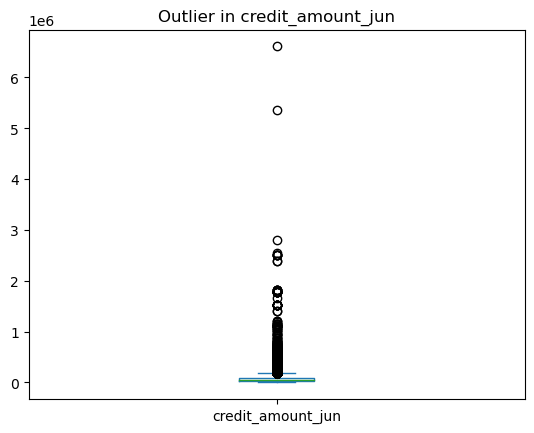

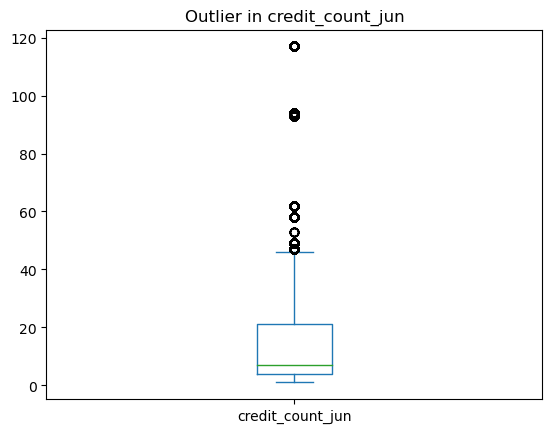

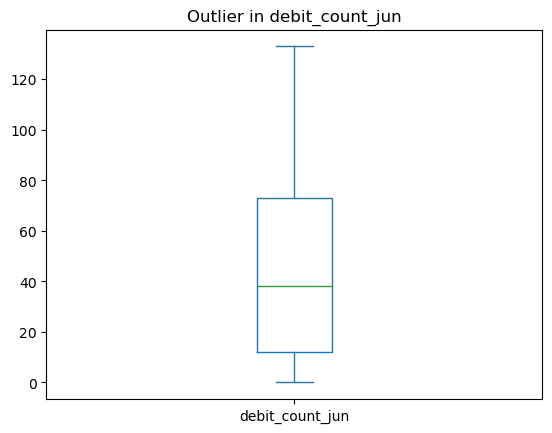

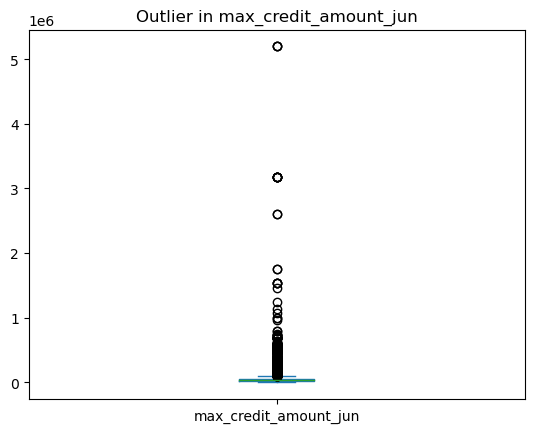

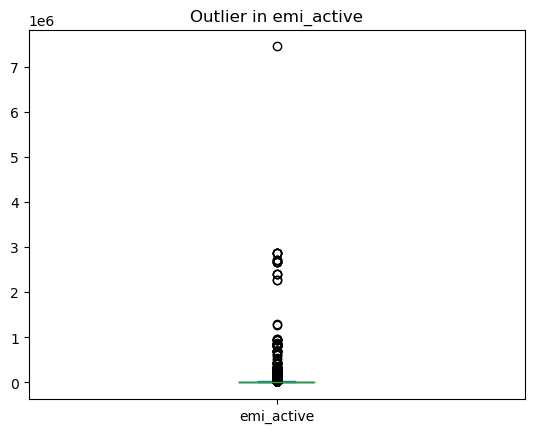

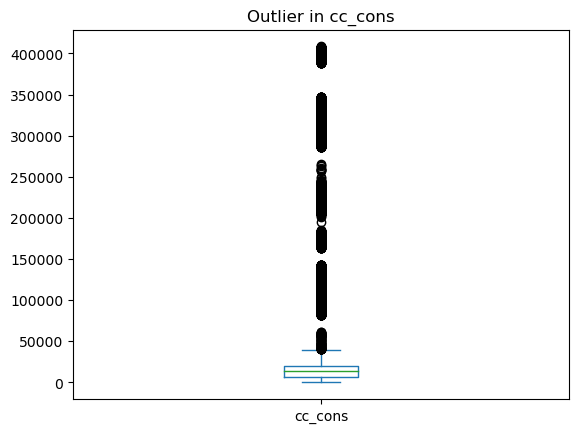

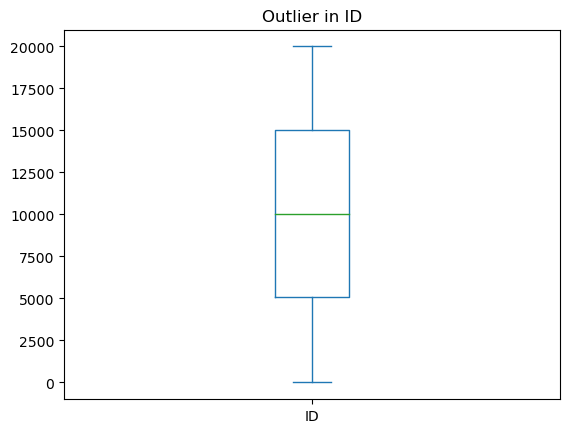

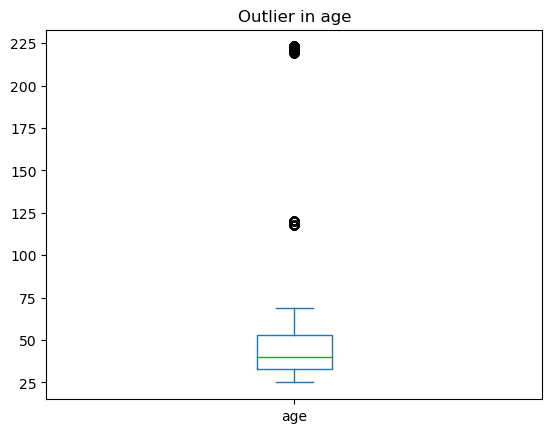

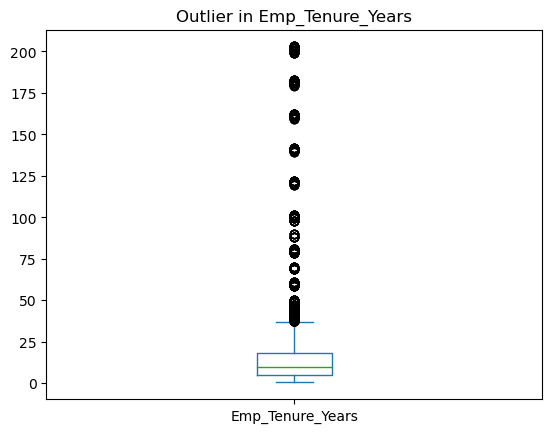

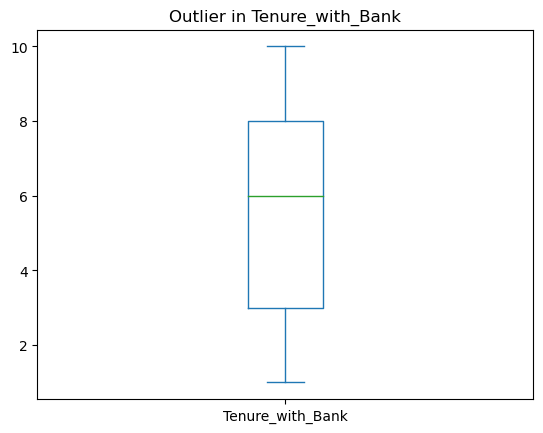

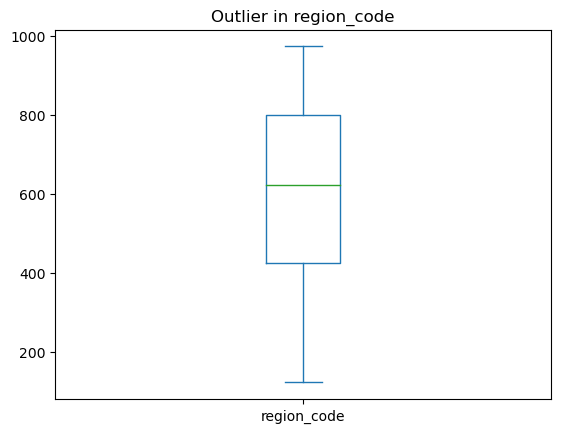

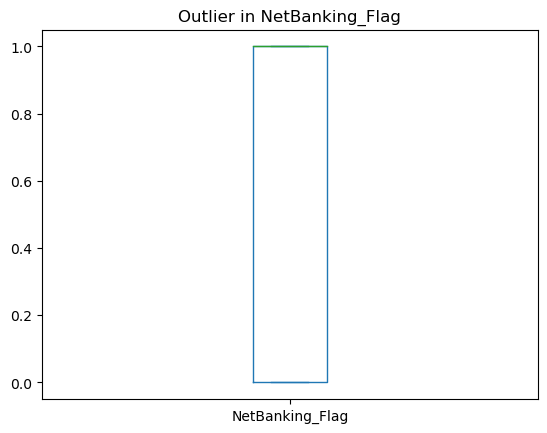

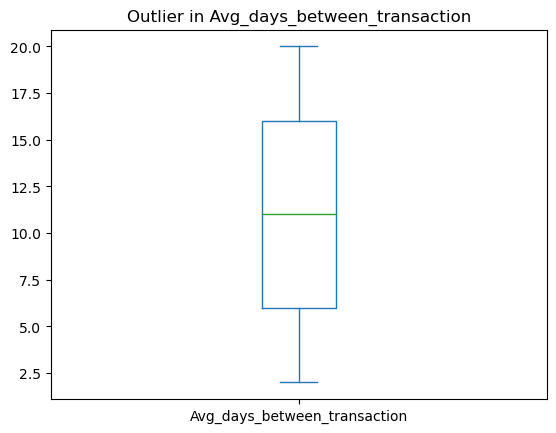

In [15]:
for i in df_num.columns:
    plt.figure()
    plt.title(f"Outlier in {i}")
    df_num[i].plot(kind='box')

##### There are outlier in every column.

### Categorical Variables

In [16]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,loan_enq,account_type,gender,Income
0,Y,current,M,MEDIUM
1,Y,current,F,MEDIUM
2,Y,current,M,MEDIUM
3,Y,current,M,MEDIUM
4,Y,current,M,MEDIUM


In [82]:
for i in df_cat.columns:
    print(f"Number of categories in {i} is ",len(df_cat[i].unique()))

Number of categories in loan_enq is  1
Number of categories in account_type is  2
Number of categories in gender is  2
Number of categories in Income is  3


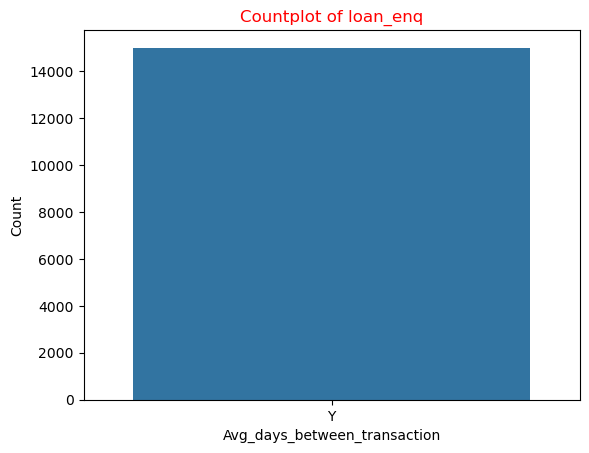

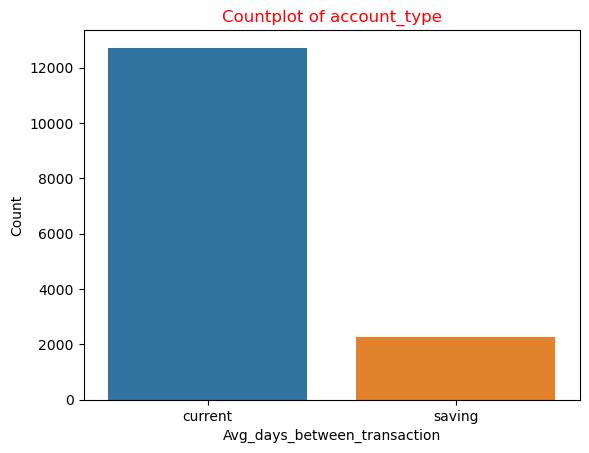

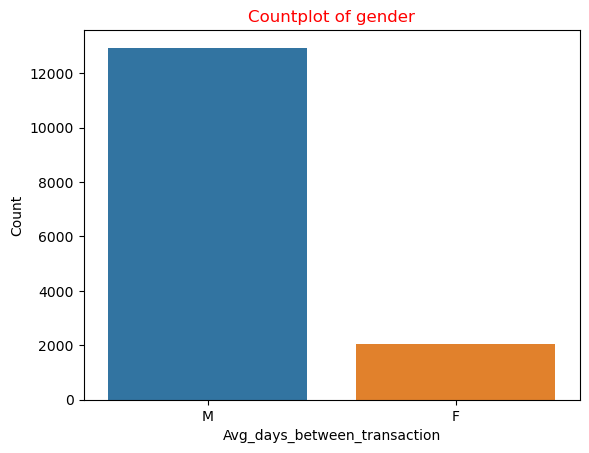

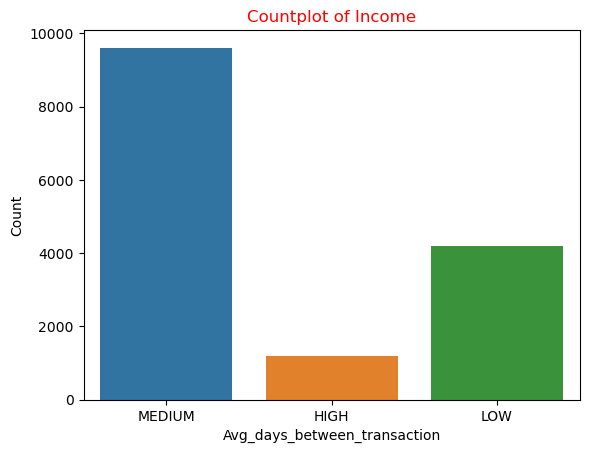

In [84]:
for i in df_cat.columns:
    sns.countplot(data=df, x=i)
    plt.title(f'Countplot of {i}',c='r')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [96]:
df['account_type'].value_counts(normalize=True)

account_type
current    0.848406
saving     0.151594
Name: proportion, dtype: float64

##### the distribution of account types (current or saving)
84.8 % of the customers are having current account rest 15.1% have saving account

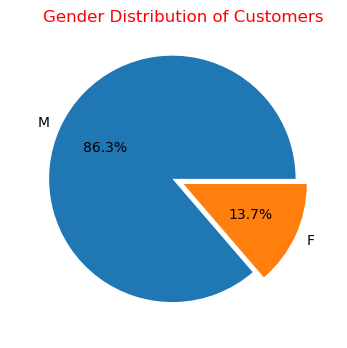

In [98]:
plt.figure(figsize=(4,4))
df['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%', explode=(0.1, 0))
plt.title('Gender Distribution of Customers',c='r')
plt.ylabel(" ")
plt.show()

##### gender distributed among customers--
86.3% of customer are MALE whereas only 13.6% are women.

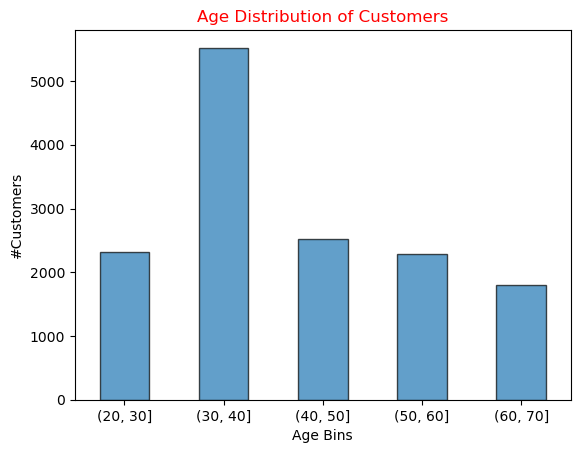

In [99]:
bins = [20, 30, 40, 50, 60, 70]
df['Age_Bin'] = pd.cut(df['age'], bins=bins)
bin_counts = df['Age_Bin'].value_counts()
bin_counts = df['Age_Bin'].value_counts().sort_index()
bin_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Age Bins')
plt.ylabel('#Customers')
plt.xticks(rotation=0)
plt.title('Age Distribution of Customers',c='r')
plt.show()

##### customer of age group 30-40 are highest.

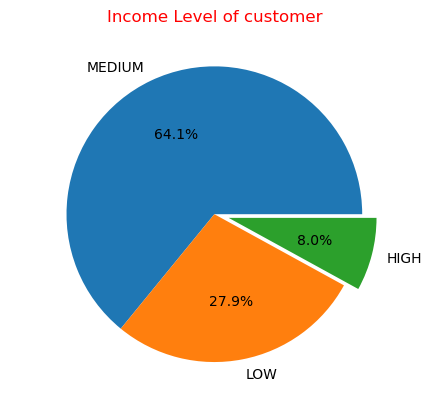

In [101]:
df['Income'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=(0, 0 ,0.1))
plt.title("Income Level of customer",c='r')
plt.ylabel(" ")
plt.show()

##### the income levels of the customers
8% of customers have high income where as 27.9% have low rest 64.1% have medium.

In [102]:
bins_tenure = [2,4, 6, 8,10]
df['Tenure_with_Bank_bins'] = pd.cut(df['Tenure_with_Bank'], bins=bins_tenure)

In [103]:
bin_counts = df['Tenure_with_Bank_bins'].value_counts().sort_index()

In [104]:
pd.DataFrame(bin_counts)

,count
Tenure_with_Bank_bins,
"(2, 4]",3002
"(4, 6]",2991
"(6, 8]",3045
"(8, 10]",2976


##### Yearly distribution of customers been with bank

In [105]:
print('Average year for which customer been with bank ',round(df['Tenure_with_Bank'].mean(),2))

Average year for which customer been with bank  5.51


In [106]:
q=df.groupby(by=['region_code']).agg(customer=('region_code','count')).sort_values(by=['customer'],ascending=False).head(10)

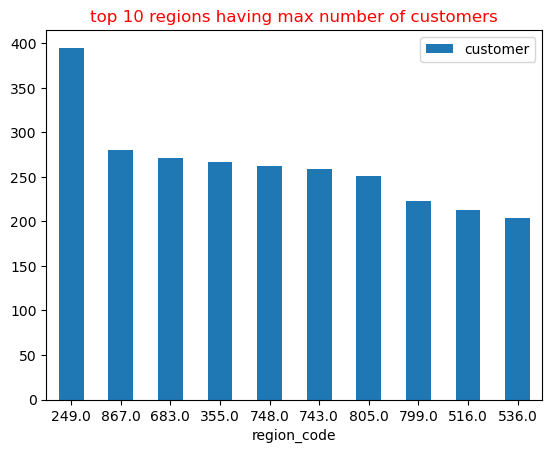

In [107]:
q.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('top 10 regions having max number of customers',c='r')
plt.show()

In [108]:
df['NetBanking_Flag'].value_counts(normalize=True)

NetBanking_Flag
1    0.719688
0    0.280312
Name: proportion, dtype: float64

##### 71.9% percentage of customers use net banking for transactions.

In [109]:
df['Avg_days_between_transaction'].mean()

11.04968654128318

##### the average number of days between transactions  is 11

In [112]:
q2=df[['age','NetBanking_Flag']].corr()

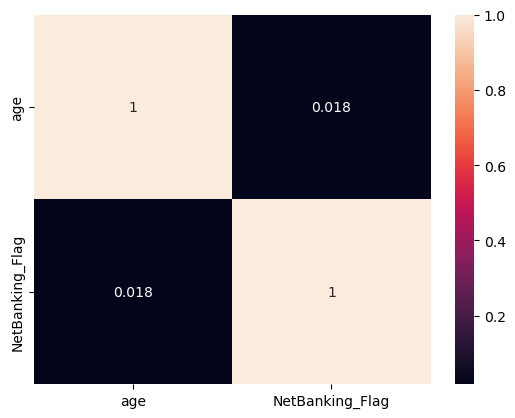

In [114]:
sns.heatmap(q2,annot=True)
plt.show()

##### correlations between variables age, and net banking usage is very low showing that age is not a factor affecting use of NetBanking

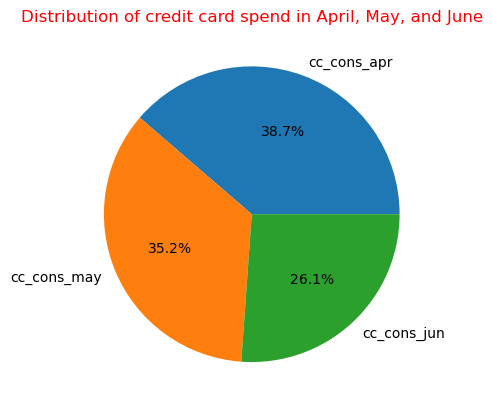

In [115]:
df[['cc_cons_apr','cc_cons_may','cc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of credit card spend in April, May, and June',c='r')
plt.show()

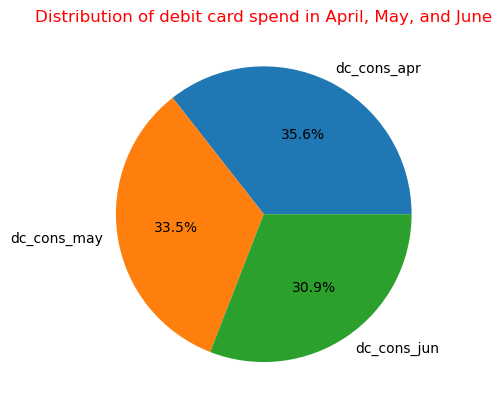

In [116]:
df[['dc_cons_apr','dc_cons_may','dc_cons_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of debit card spend in April, May, and June',c='r')
plt.show()

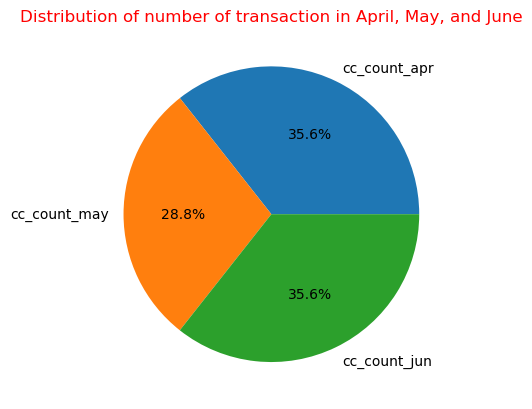

In [117]:
df[['cc_count_apr','cc_count_may','cc_count_jun']].sum().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of number of transaction in April, May, and June',c='r')
plt.show()

In [118]:
auto=[250000,250000*2,250000*3,250000*4]

In [119]:
df['card_lim_bin']=pd.cut(df['card_lim'],bins=auto,right=True)

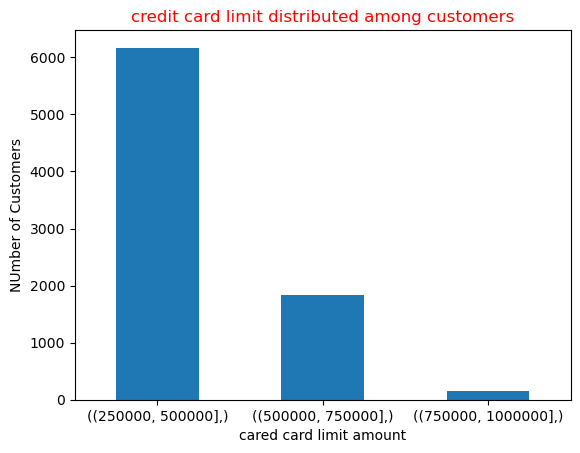

In [120]:
df[['card_lim_bin']].value_counts().plot(kind='bar',)
plt.title("credit card limit distributed among customers",c='r')
plt.ylabel("NUmber of Customers")
plt.xlabel("cared card limit amount")
plt.xticks(rotation=0)
plt.show()

##### Max number of customer have there limit between 25,000 to 50,000

In [121]:
df['personal_loan_active'].value_counts()

personal_loan_active
1    14994
Name: count, dtype: int64

In [122]:
df['vehicle_loan_active'].value_counts()

vehicle_loan_active
1    14994
Name: count, dtype: int64

In [123]:
df['vehicle_loan_closed'].value_counts()

vehicle_loan_closed
1    14994
Name: count, dtype: int64

In [124]:
df['personal_loan_closed'].value_counts()

personal_loan_closed
1.0    14994
Name: count, dtype: int64

##### by the above elavuation ,it looks like every customer have an active personal loan and active vihicle loan but also closed personal loan and closed vehicle loan in last 12 months with other bank.

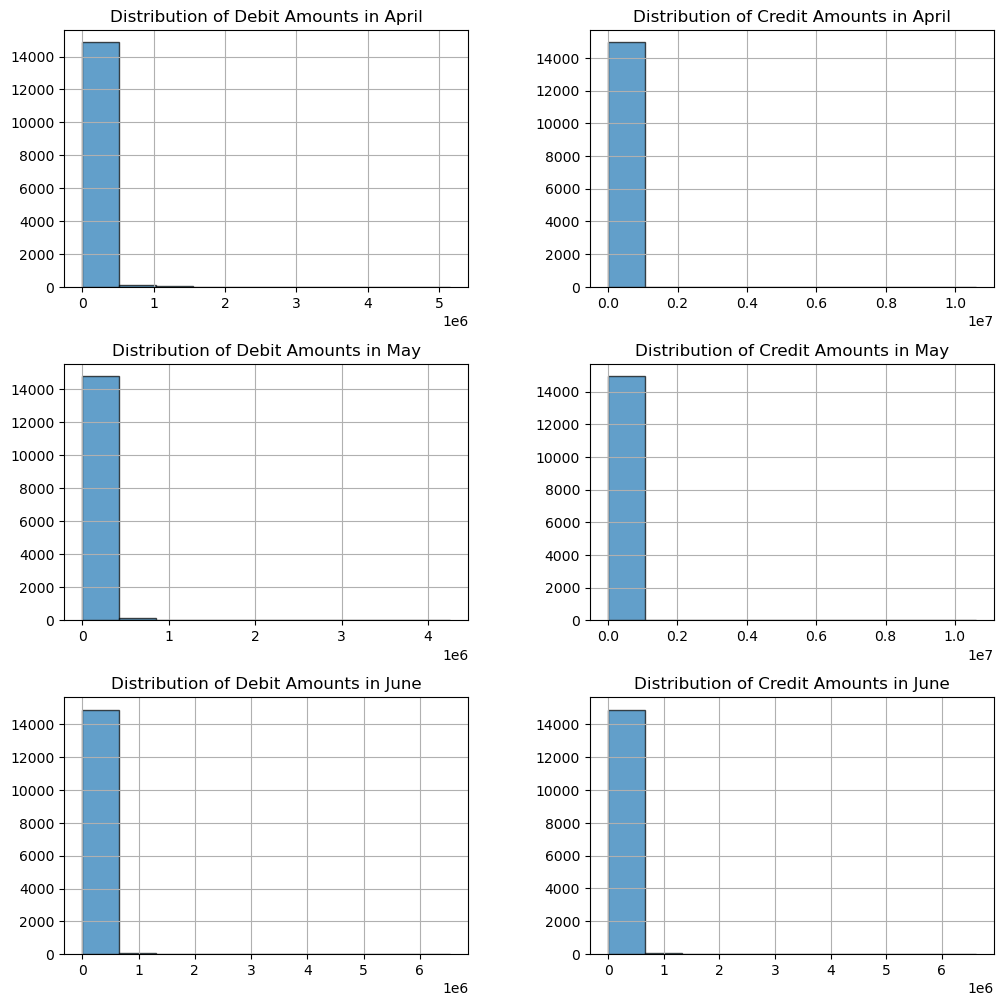

In [126]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
df[['debit_amount_apr', 'credit_amount_apr']].hist(ax=axes[0], bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Debit Amounts in April')
axes[0, 1].set_title('Distribution of Credit Amounts in April')

df[['debit_amount_may', 'credit_amount_may']].hist(ax=axes[1], bins=10, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Debit Amounts in May')
axes[1, 1].set_title('Distribution of Credit Amounts in May')

# Plot histograms for Debit and Credit amounts in June
df[['debit_amount_jun', 'credit_amount_jun']].hist(ax=axes[2], bins=10, edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Distribution of Debit Amounts in June')
axes[2, 1].set_title('Distribution of Credit Amounts in June')
plt.show()

##### distribution of debit and credit amounts in April, May, and June


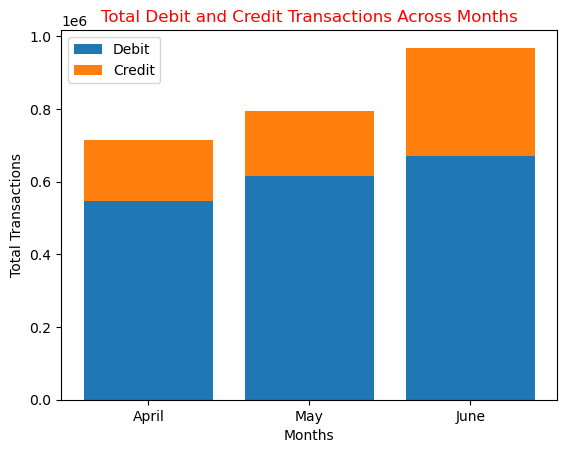

In [127]:
df['Total_Debit_Apr_May_Jun'] = df['debit_count_apr'] + df['debit_count_may'] + df['debit_count_jun']
df['Total_Credit_Apr_May_Jun'] = df['credit_count_apr'] + df['credit_count_may'] + df['credit_count_jun']

months = ['April', 'May', 'June']
debit_counts = df[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].sum()
credit_counts = df[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].sum()
plt.bar(months, debit_counts,  label='Debit')
plt.bar(months, credit_counts,label='Credit', bottom=debit_counts)
plt.xlabel('Months')
plt.ylabel('Total Transactions')
plt.title('Total Debit and Credit Transactions Across Months',c='r')
plt.legend()
plt.show()